# Darstellung der Ergebnisse der Klassifizierung in Karten

In diesem Jupyter Notebook wurden die Klassifizierungen in Karten dargestellt.  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from haversine import haversine

In [7]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_53/merkmaleMitLabelnFuzzyVersuch2_1_6.csv")

In [3]:
featuresDf['Klasse'].value_counts()

0    3933
1    3395
2    1720
Name: Klasse, dtype: int64

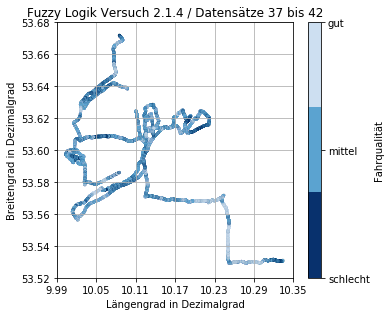

In [9]:
plt.figure(figsize=(5.5,4.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 2.1.4 / Datensätze 37 bis 42')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1, s=4)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.grid()
plt.ylim(featuresDf['Breitengrad'].min()-0.009,featuresDf['Breitengrad'].max()+0.006)
plt.xlim(featuresDf['Laengengrad'].min()-0.009,featuresDf['Laengengrad'].max()+0.015)
plt.xticks(np.arange(np.around(featuresDf['Laengengrad'].min()-0.009,decimals=2),np.around(featuresDf['Laengengrad'].max()+0.025,decimals=2),0.06))
plt.yticks(np.arange(np.around(featuresDf['Breitengrad'].min()-0.009, decimals=2),np.around(featuresDf['Breitengrad'].max()+0.02,decimals=2),0.02))
plt.tight_layout()
plt.savefig("karteFuzzyVersuch2_1_4_datensatz37_bis_42.png")

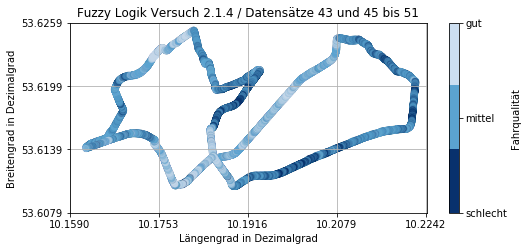

In [50]:
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 2.1.4 / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.0005)
plt.xticks(np.arange(np.around(featuresDf['Laengengrad'].min()-0.0025,decimals=3),np.around(featuresDf['Laengengrad'].max()+0.004,decimals=3),0.0163))
plt.yticks(np.arange(np.around(featuresDf['Breitengrad'].min()-0.0025, decimals=4),np.around(featuresDf['Breitengrad'].max()+0.003,decimals=4),0.006))
plt.grid()
plt.savefig("karteFuzzyVersuch2_1_4_datensatz43_45_bis_51.png", dpi=300)

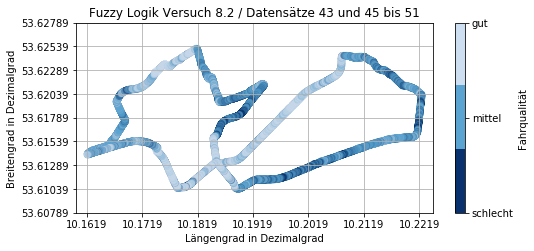

In [3]:
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 8.2 / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.002)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min()-0.0025,featuresDf['Breitengrad'].max()+0.003,0.0025))
plt.grid()
#plt.savefig("karteFuzzyVersuch8_datensatz43_45_bis_51.png")

In [103]:
featuresDf['Breitengrad'].min()

53.610390000000002

In [3]:
featuresDf = featuresDf[featuresDf['Klasse'] != 1]
i = 0
while i < featuresDf.shape[0]:
    labelNr = featuresDf['Klasse'].iloc[i]
    if labelNr == 2:
        featuresDf.iat[i,29] = 1
    i = i + 1

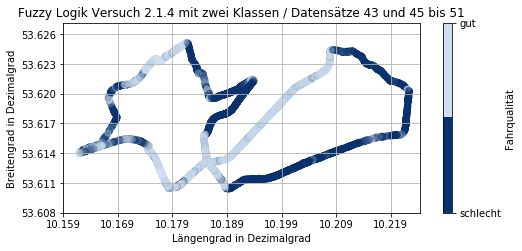

In [6]:
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#08316d'])
plt.title('Fuzzy Logik Versuch 2.1.4 mit zwei Klassen / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[1, 0])
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht','gut'])
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.002)
plt.xticks(np.arange(np.around(featuresDf['Laengengrad'].min()-0.0025,decimals=3),np.around(featuresDf['Laengengrad'].max(),decimals=3),0.01))
plt.yticks(np.arange(np.around(featuresDf['Breitengrad'].min()-0.0025, decimals=3),np.around(featuresDf['Breitengrad'].max()+0.003,decimals=3),0.003))
plt.grid()
plt.savefig("karteFuzzyVersuch2_1_4_2Klassen_datensatz43_45_bis_51.png")

In [26]:
featuresDf['Laengengrad'].min()

10.161906

## OpenStreetMap Route Generator

Mit den folgenden Zellen ist es möglich zu einem erfassten Datensatz eine Route in OpenStreetMap (OSM) zu erstellen. Als API wurde die OSM Test API genutzt. Der Aufruf der OSM API und Bearbeitung erfolgte mit den OSM Python wrapper [osmapi](https://github.com/metaodi/osmapi).

In [104]:
from osmapi import OsmApi
from haversine import haversine

In [105]:
MyApi = OsmApi(api="https://api06.dev.openstreetmap.org", username = u"morro34@hotmail.de", passwordfile = "C:/Users/morro/Documents/osmapipw/passwort.txt")

In [106]:
MyApi.ChangesetCreate({u"Klassifizierung der Fahrqualität von Radwegen": u"Dies ist eine Beispiel Anwendung für die Klassifizierung von Radwegen nach deren Fahrqualität bzw, Gleichmäßigkeit. "})

126863

In [5]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_52/merkmaleMitLabelnFuzzyVersuch8.csv")

In [35]:
featuresDf = featuresDf[:8000]

In [108]:
haversine([featuresDf['Breitengrad'].iloc[0],featuresDf['Laengengrad'].iloc[0]], [featuresDf['Breitengrad'].iloc[2],featuresDf['Laengengrad'].iloc[2]]) * 1000

3.116520516543083

Die folgenden zwei Zellen erstellen eine Route (Relation) für OSM.
Dabei gibt maxMeter den maximalen Abstand zwischen zwei Knoten an (Nodes). Ein Knoten besteht aus den Koordinaten Breitengrad und Längengrad sowie Attributen.
Zwei Knoten werden dann durch eine Linie als Weg (Way) verbunden. Diesen Weg wird dann das Tag bzw. Attribut [smoothness](https://wiki.openstreetmap.org/wiki/Key:smoothness) zugeordnet. Hierbei muss der linguistische smoothness Wert berechnet werden.
Dies geschieht indem die häufigste klassifizierte Klasse der Daten ausgewählt wird. Die Klassen "gut", "mittel" und "schlecht" werden dabei den smoothness Werten "good","intermediate","bad" zugeordnet.

In [109]:
maxMeter = 20
sumMeter = 0
ways = []
i = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
countFeatures = 0
smoothness = 'none'
colorCode = 'none'
maxLength = len(featuresDf) - 1
lastNode = MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i], u"lat":featuresDf['Breitengrad'].iloc[i], u"tag": {}}).get('id')
if featuresDf['Klasse'].iloc[i] == 0:
        smoothnessGood = smoothnessGood + 1
        colorCode = '#FFFFFF'
elif featuresDf['Klasse'].iloc[i] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
        colorCode = '#00FFFF'
elif featuresDf['Klasse'].iloc[i] == 2:
        smoothnessBad = smoothnessBad + 1
        colorCode = '#0000FF'
countFeatures = + 1  

In [110]:
while i < maxLength:
    if featuresDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    countFeatures = countFeatures + 1 
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            smoothness = 'good'
            colorCode = '#cddff1'
        elif smoothnessIntermediate > smoothnessBad:
            smoothness = 'intermediate'
            colorCode = '#5ba3d0'
        else:
            smoothness = 'bad'
            colorCode = '#08316d'
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        node = MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i+1], u"lat":featuresDf['Breitengrad'].iloc[i+1], u"tag": {}}).get('id')
        ways.append(MyApi.WayCreate(
            {   'nd': [lastNode, node],
            'tag': { u'highway':'* ',
                    u'bicycle':'yes', 
                   u'smoothness':smoothness,
                   u'color':colorCode} 
            }).get('id'))
        lastNode = node
    i = i + 1

In [111]:
membersList = []
for way in ways:
    membersList.append({
      "type": "way",
      "ref": way,
      "role": ""
    })

In [112]:
MyApi.RelationCreate({
        'member':  membersList,
    'tag': {"name": "Höltigbaum Route"}
    })

{'changeset': 126863,
 'id': 4304734764,
 'member': [{'ref': 4305089387, 'role': '', 'type': 'way'},
  {'ref': 4305089388, 'role': '', 'type': 'way'},
  {'ref': 4305089389, 'role': '', 'type': 'way'},
  {'ref': 4305089390, 'role': '', 'type': 'way'},
  {'ref': 4305089391, 'role': '', 'type': 'way'},
  {'ref': 4305089392, 'role': '', 'type': 'way'},
  {'ref': 4305089393, 'role': '', 'type': 'way'},
  {'ref': 4305089394, 'role': '', 'type': 'way'},
  {'ref': 4305089395, 'role': '', 'type': 'way'},
  {'ref': 4305089396, 'role': '', 'type': 'way'},
  {'ref': 4305089397, 'role': '', 'type': 'way'},
  {'ref': 4305089398, 'role': '', 'type': 'way'},
  {'ref': 4305089399, 'role': '', 'type': 'way'},
  {'ref': 4305089400, 'role': '', 'type': 'way'},
  {'ref': 4305089401, 'role': '', 'type': 'way'},
  {'ref': 4305089402, 'role': '', 'type': 'way'},
  {'ref': 4305089403, 'role': '', 'type': 'way'},
  {'ref': 4305089404, 'role': '', 'type': 'way'},
  {'ref': 4305089405, 'role': '', 'type': 'way'},

# Diagramm mit gleicher Klassifizierung wie in OSM

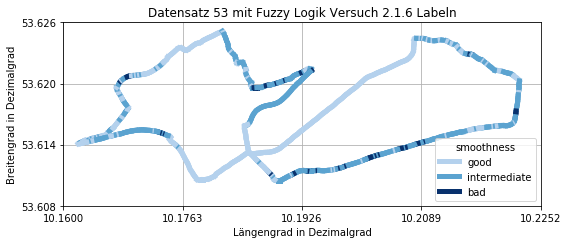

In [9]:
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Datensatz 53 mit Fuzzy Logik Versuch 2.1.6 Labeln')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(featuresDf) - 1
while i < maxLength:
    if featuresDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([featuresDf['Laengengrad'].iloc[indexbegin],featuresDf['Laengengrad'].iloc[i]], [featuresDf['Breitengrad'].iloc[indexbegin],featuresDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.0005)
plt.xticks(np.arange(np.around(featuresDf['Laengengrad'].min()-0.0025,decimals=3),np.around(featuresDf['Laengengrad'].max()+0.004,decimals=3),0.0163))
plt.yticks(np.arange(np.around(featuresDf['Breitengrad'].min()-0.0025, decimals=4),np.around(featuresDf['Breitengrad'].max()+0.003,decimals=4),0.006))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='good')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='intermediate')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='bad')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4, title="smoothness")
plt.savefig("versuch2_3_8_fuzzy_logik_2_1_6_datensatz53.png", dpi=300)

In [38]:
segmentFeaturesDf = featuresDf[3300:4700]

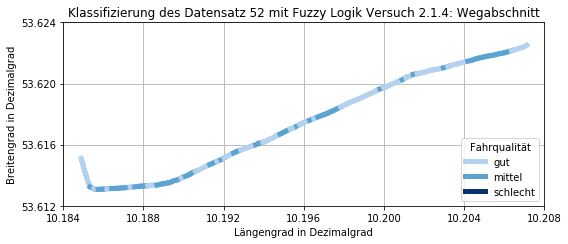

In [39]:
# Ausschnitt
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Klassifizierung des Datensatz 52 mit Fuzzy Logik Versuch 2.1.4: Wegabschnitt')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(segmentFeaturesDf) - 1
while i < maxLength:
    if segmentFeaturesDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif segmentFeaturesDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif segmentFeaturesDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([segmentFeaturesDf['Laengengrad'].iloc[i],segmentFeaturesDf['Breitengrad'].iloc[i]], [segmentFeaturesDf['Laengengrad'].iloc[i+1],segmentFeaturesDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([segmentFeaturesDf['Laengengrad'].iloc[indexbegin],segmentFeaturesDf['Laengengrad'].iloc[i]], [segmentFeaturesDf['Breitengrad'].iloc[indexbegin],segmentFeaturesDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(segmentFeaturesDf['Laengengrad'].min()-0.0005,segmentFeaturesDf['Laengengrad'].max()+0.0005)
plt.ylim(segmentFeaturesDf['Breitengrad'].min()-0.0005,segmentFeaturesDf['Breitengrad'].max()+0.0005)
#plt.xticks(np.arange(segmentFeaturesDf['Laengengrad'].min(),segmentFeaturesDf['Laengengrad'].max(),0.005))
#plt.yticks(np.arange(segmentFeaturesDf['Breitengrad'].min(),segmentFeaturesDf['Breitengrad'].max()+0.0015,0.0025))
plt.xticks(np.arange(np.around(segmentFeaturesDf['Laengengrad'].min()-0.0004,decimals=3),np.around(segmentFeaturesDf['Laengengrad'].max()+0.0004,decimals=3),0.004))
plt.yticks(np.arange(np.around(segmentFeaturesDf['Breitengrad'].min()-0.0015, decimals=3),np.around(segmentFeaturesDf['Breitengrad'].max()+0.0015,decimals=3),0.004))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='gut')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='mittel')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='schlecht')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4, title="Fahrqualität")
plt.savefig("karteFuzzyVersuch2_1_4_datensatz52Abschnitt.png")

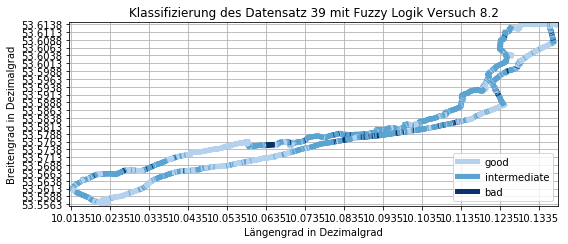

In [24]:
# Nach Fuzzy Logik Versuch 8.2
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Klassifizierung des Datensatz 39 mit Fuzzy Logik Versuch 8.2')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(featuresDf) - 1
while i < maxLength:
    if featuresDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([featuresDf['Laengengrad'].iloc[indexbegin],featuresDf['Laengengrad'].iloc[i]], [featuresDf['Breitengrad'].iloc[indexbegin],featuresDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.0005,featuresDf['Laengengrad'].max()+0.0005)
plt.ylim(featuresDf['Breitengrad'].min()-0.0005,featuresDf['Breitengrad'].max()+0.0005)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.0015,0.0025))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='good')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='intermediate')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='bad')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4)
plt.savefig("karteFuzzyVersuch8_2_datensatz39.png")

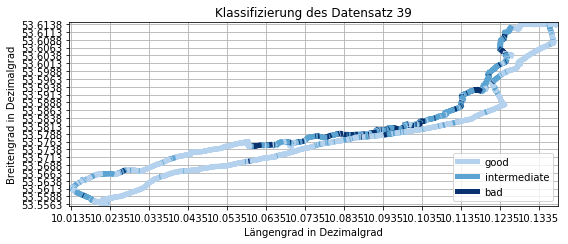

In [25]:
# Faltungsnetz Klassifizierung
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Klassifizierung des Datensatz 39')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(featuresDf) - 1
while i < maxLength:
    if featuresDf['vorhergesagte Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['vorhergesagte Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['vorhergesagte Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([featuresDf['Laengengrad'].iloc[indexbegin],featuresDf['Laengengrad'].iloc[i]], [featuresDf['Breitengrad'].iloc[indexbegin],featuresDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.0005,featuresDf['Laengengrad'].max()+0.0005)
plt.ylim(featuresDf['Breitengrad'].min()-0.0005,featuresDf['Breitengrad'].max()+0.0005)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.0015,0.0025))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='good')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='intermediate')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='bad')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4)
plt.savefig("karteVorhersageTest_4_datensatz39.png")

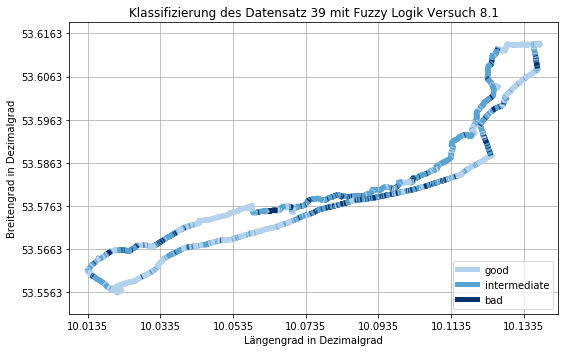

In [35]:
# Nach Fuzzy Logik Versuch 8.1 / Datensatz 39
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Klassifizierung des Datensatz 39 mit Fuzzy Logik Versuch 8.1')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(featuresDf) - 1
while i < maxLength:
    if featuresDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([featuresDf['Laengengrad'].iloc[indexbegin],featuresDf['Laengengrad'].iloc[i]], [featuresDf['Breitengrad'].iloc[indexbegin],featuresDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.005,featuresDf['Laengengrad'].max()+0.005)
plt.ylim(featuresDf['Breitengrad'].min()-0.005,featuresDf['Breitengrad'].max()+0.005)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.02))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.005,0.01))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='good')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='intermediate')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='bad')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4)
plt.savefig("karteFuzzyVersuch8_1_datensatz39.png")

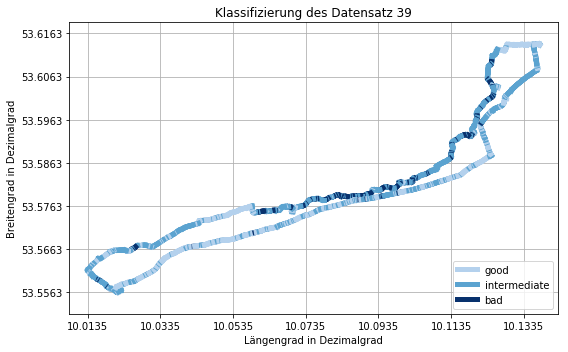

In [37]:
# Faltungsnetz Klassifizierung / Datensatz 39
maxMeter = 20
sumMeter = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
fig = plt.figure(figsize=(8,5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Klassifizierung des Datensatz 39')
color = 'none'
i = 0
indexbegin = 0
maxLength = len(featuresDf) - 1
while i < maxLength:
    if featuresDf['vorhergesagte Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['vorhergesagte Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['vorhergesagte Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            colorCode = '#b4d1ed'
        elif smoothnessIntermediate > smoothnessBad:
            colorCode = '#5ba3d0'
        else:
            colorCode = '#08316d'
        plt.plot([featuresDf['Laengengrad'].iloc[indexbegin],featuresDf['Laengengrad'].iloc[i]], [featuresDf['Breitengrad'].iloc[indexbegin],featuresDf['Breitengrad'].iloc[i]], c=colorCode, linewidth=5)
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        indexbegin = i
    i = i + 1
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.005,featuresDf['Laengengrad'].max()+0.005)
plt.ylim(featuresDf['Breitengrad'].min()-0.005,featuresDf['Breitengrad'].max()+0.005)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.02))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.005,0.01))
plt.grid()
plt.tight_layout()
good_line = mlines.Line2D([], [], color='#b4d1ed', linewidth=5, label='good')
intermediate_line = mlines.Line2D([], [], color='#5ba3d0', linewidth=5, label='intermediate')
bad_line = mlines.Line2D([], [], color='#08316d', linewidth=5, label='bad')
plt.legend(handles=[good_line,intermediate_line,bad_line],loc=4)
plt.savefig("karteVorhersageTest_4_datensatz39.png")